Objectives: To predict miles per gallon of cars

DATA PREPROCESSING

Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Check dataset in seaborn and load mpg

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('mpg')

Explore the data

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [6]:
df=df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name','mpg']]

In [7]:
df.drop('name',axis=1,inplace=True)

In [8]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504,12.0,70,usa,18.0
1,8,350.0,165.0,3693,11.5,70,usa,15.0
2,8,318.0,150.0,3436,11.0,70,usa,18.0
3,8,304.0,150.0,3433,12.0,70,usa,16.0
4,8,302.0,140.0,3449,10.5,70,usa,17.0


In [9]:
df.shape

(398, 8)

In [152]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    object 
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [154]:
df.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
mpg             float64
dtype: object

In [10]:
df.isna().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [11]:
df.isnull().sum().sum()

6

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


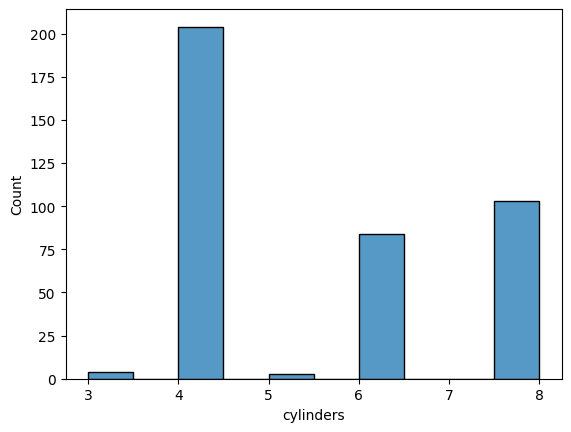

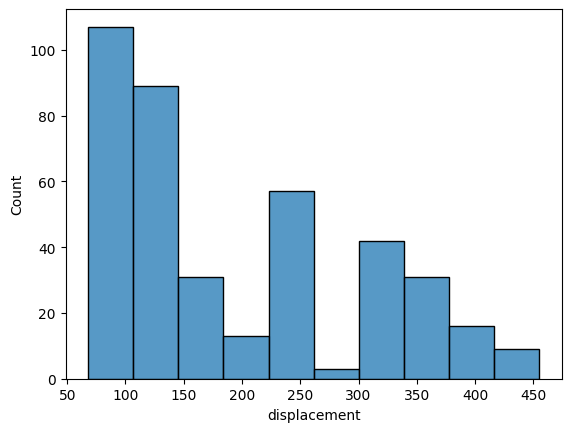

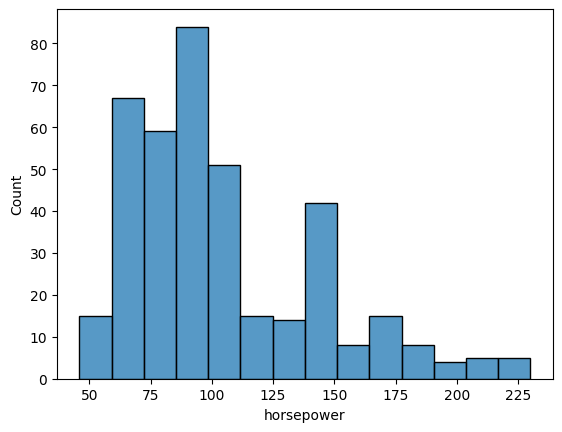

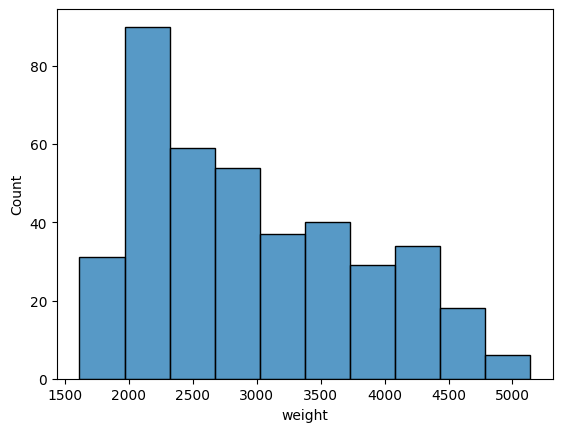

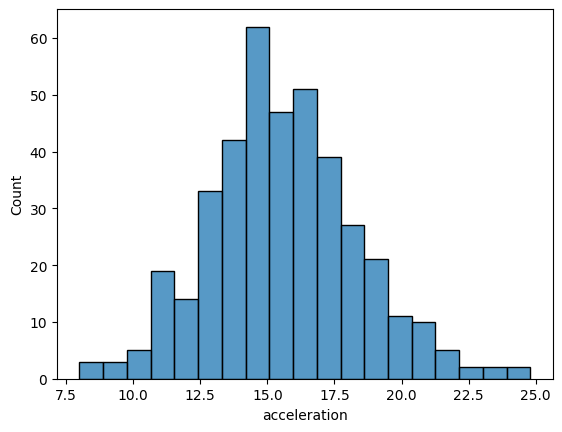

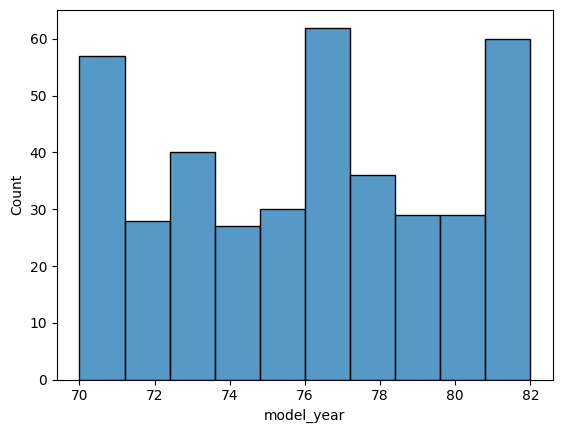

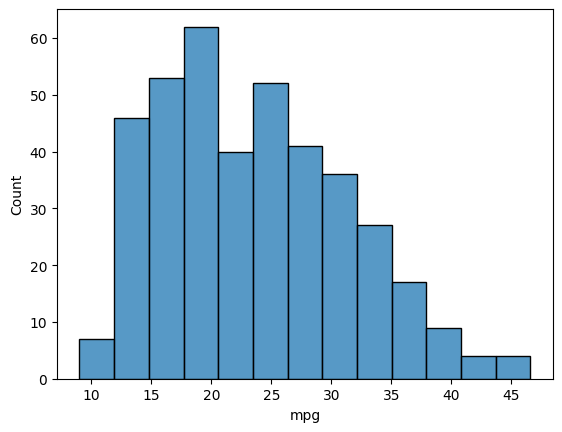

In [13]:
#Plot histogram for each numeric variable
for i in df.select_dtypes(include='number').columns: #Do this to understand the distribution of the data
  sns.histplot(data=df,x=i)
  plt.show()


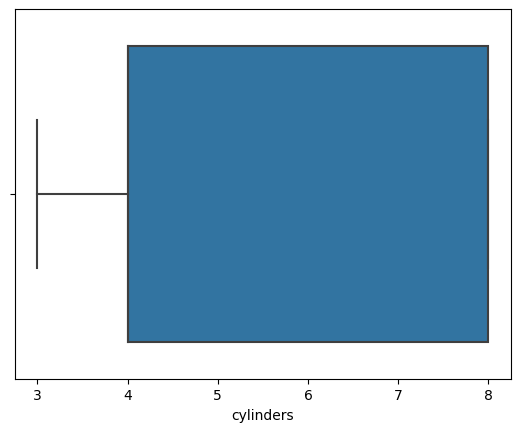

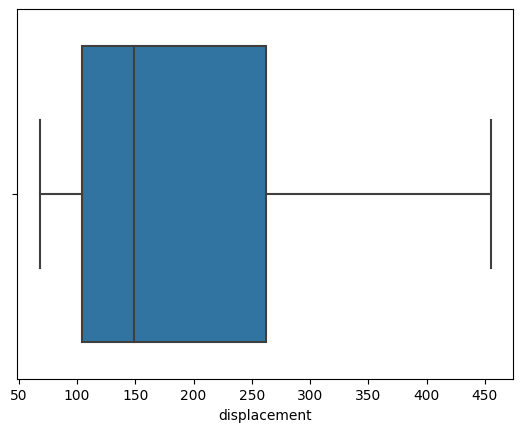

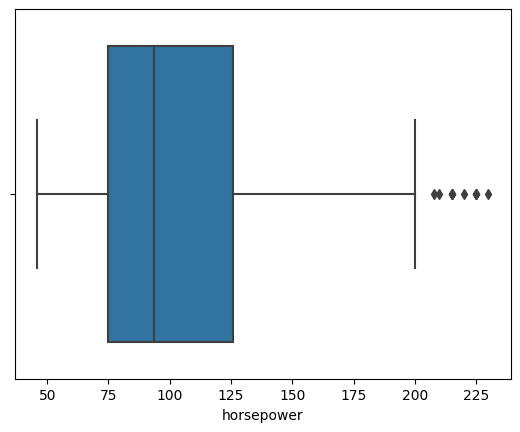

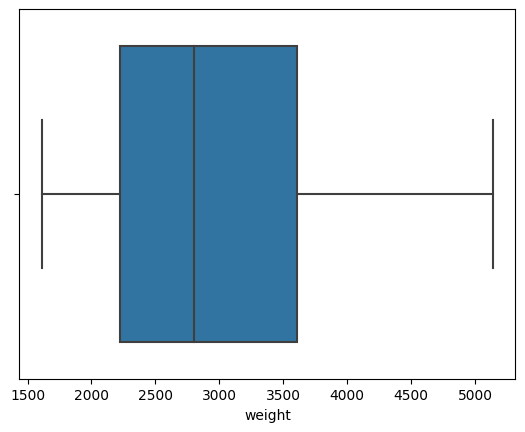

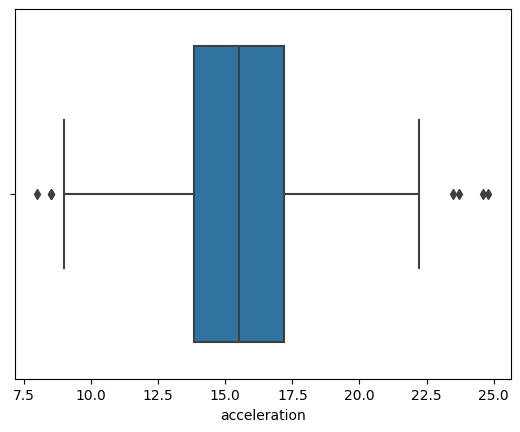

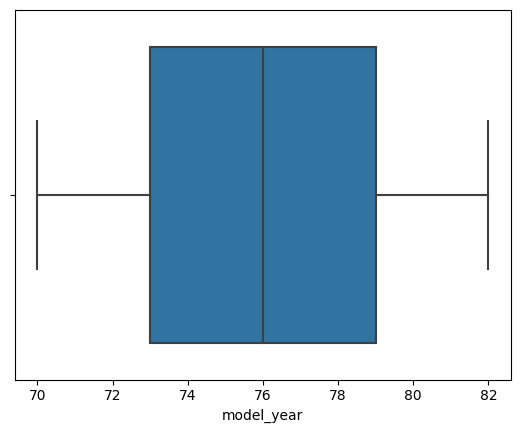

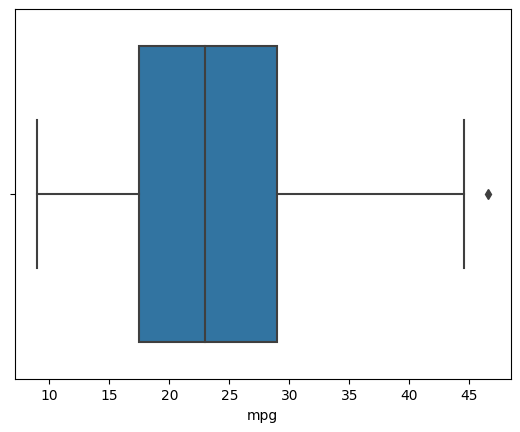

In [14]:
#Plot boxplot for each numeric variable
for i in df.select_dtypes(include='number').columns: #Do this to identify outliers the data
  sns.boxplot(data=df,x=i)
  plt.show()

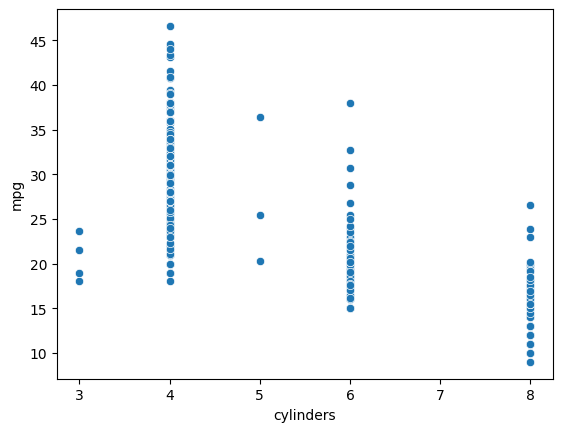

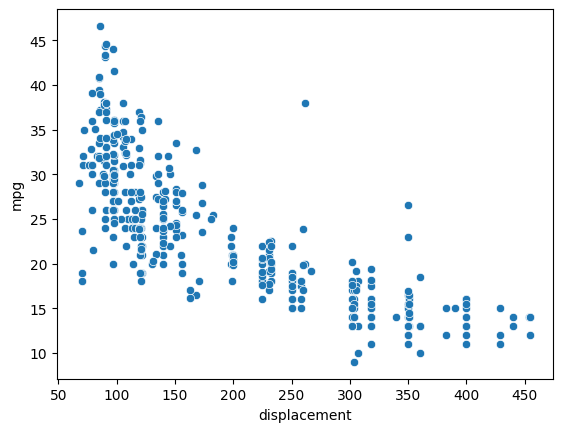

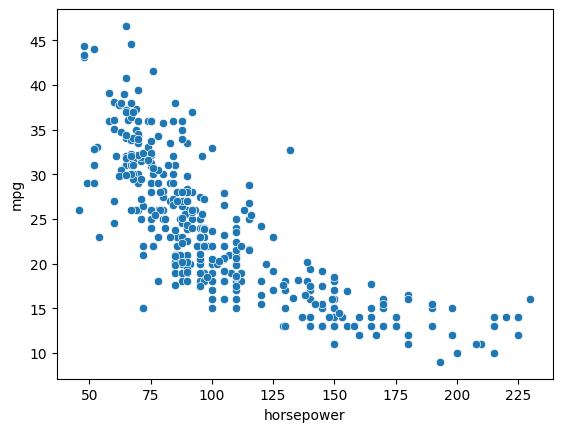

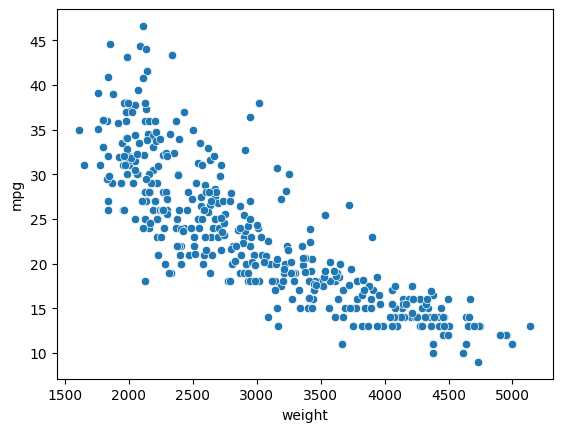

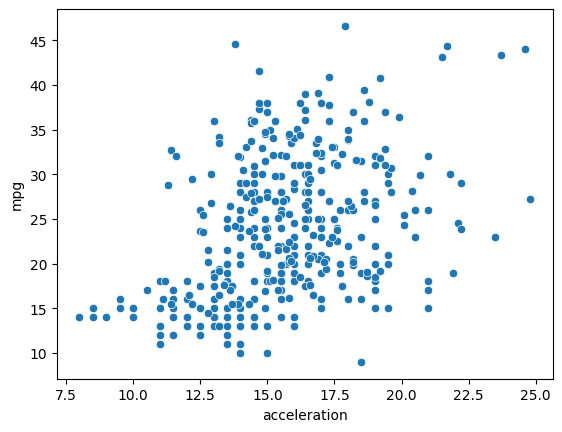

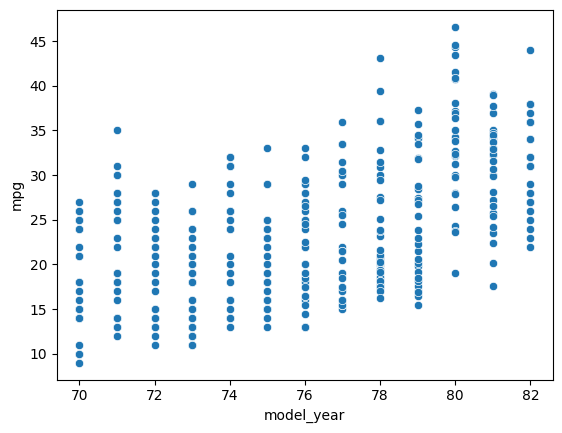

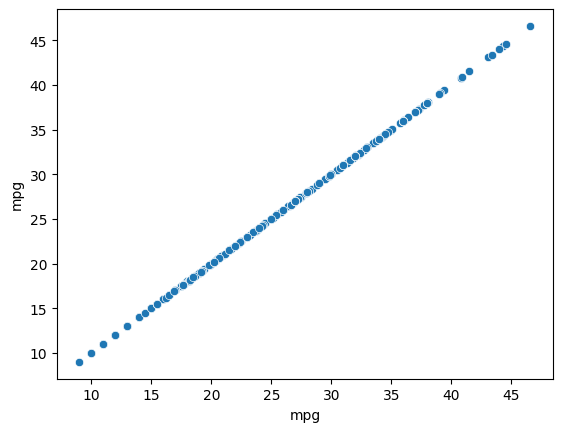

In [15]:
#Plot boxplot for each numeric variable
nc=df.select_dtypes(include='number').columns #numeric variable
for i in nc: #Do this to identify outliers the data
  sns.scatterplot(data=df,x=i,y='mpg')
  plt.show()

In [16]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

In [17]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [19]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504,12.0,70,usa,18.0
1,8,350.0,165.0,3693,11.5,70,usa,15.0
2,8,318.0,150.0,3436,11.0,70,usa,18.0
3,8,304.0,150.0,3433,12.0,70,usa,16.0
4,8,302.0,140.0,3449,10.5,70,usa,17.0


In [20]:
dummies=pd.get_dummies(df.origin)

In [21]:
dummies.head()

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
df=pd.concat([dummies,df],axis=1)


In [23]:
df.head()

,europe,japan,usa,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,0,0,1,8,307.0,130.0,3504,12.0,70,usa,18.0
1,0,0,1,8,350.0,165.0,3693,11.5,70,usa,15.0
2,0,0,1,8,318.0,150.0,3436,11.0,70,usa,18.0
3,0,0,1,8,304.0,150.0,3433,12.0,70,usa,16.0
4,0,0,1,8,302.0,140.0,3449,10.5,70,usa,17.0


In [24]:
df.drop('origin',axis=1,inplace=True)

In [25]:
df.head()

,europe,japan,usa,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
0,0,0,1,8,307.0,130.0,3504,12.0,70,18.0
1,0,0,1,8,350.0,165.0,3693,11.5,70,15.0
2,0,0,1,8,318.0,150.0,3436,11.0,70,18.0
3,0,0,1,8,304.0,150.0,3433,12.0,70,16.0
4,0,0,1,8,302.0,140.0,3449,10.5,70,17.0


Get the target and features

In [26]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [ ]:
print(X)

Split the data into train and test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train

Transform the data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
trans=StandardScaler()

In [31]:
X_train[:,3:]=trans.fit_transform(X_train[:,3:])
X_test[:,3:]=trans.transform(X_test[:,3:])

In [ ]:
X_train

MODELLING

MULTIPLE REGRESSION

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lmodel=LinearRegression()

In [ ]:
lmodel.fit(X_train,y_train)

Evaluate

In [35]:
y_test_pred=lmodel.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test_pred,y_test)

11.18498926908656

In [36]:
r2_score(y_test_pred,y_test)

0.7783601235204738

KTH NEAREST NEIGHBOURS

Build the model

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
kmodel=KNeighborsRegressor(n_neighbors=5,p=2,metric='euclidean')

In [39]:
kmodel.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean')

Evaluate

In [40]:
y_test_pred=kmodel.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test_pred,y_test)

9.972088000000001

In [41]:
r2_score(y_test_pred,y_test)

0.8079437219211413

DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
dmodel=DecisionTreeRegressor()

In [44]:
dmodel.fit(X_train,y_train)

DecisionTreeRegressor()

Evaluate

In [45]:
y_test_pred=dmodel.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test_pred,y_test)

10.058

In [46]:
r2_score(y_test_pred,y_test)

0.8398884383135665

SUPPORT VECTOR MACHINE

In [47]:
from sklearn.svm import SVR

In [48]:
smodel=SVR(kernel='linear') #'linear', 'sigmoid', 'rbf', 'poly', 'precomputed'

In [49]:
smodel.fit(X_train,y_train)

SVR(kernel='linear')

Evaluate

In [50]:
y_test_pred=smodel.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test_pred,y_test)

11.74857079009209

In [51]:
r2_score(y_test_pred,y_test)

0.7334089123932208

RANDOM FOREST REGRESSION

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rmodel=RandomForestRegressor()

In [54]:
rmodel.fit(X_train,y_train)

RandomForestRegressor()

Evaluate

In [55]:
y_test_pred=rmodel.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test_pred,y_test)

6.7569570100000025

In [56]:
r2_score(y_test_pred,y_test)

0.8714373358625184